In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Read the data
df = pd.read_csv('austin_weather.csv')
df.head(10)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
5,2013-12-26,57,48,39,39,36,33,79,63,47,...,30.4,30.34,10,9,7,12,3,17,0,
6,2013-12-27,60,53,45,41,39,37,83,65,47,...,30.39,30.34,10,9,7,7,1,11,T,
7,2013-12-28,62,51,40,43,39,33,92,64,36,...,30.17,30.04,10,10,7,10,2,14,T,
8,2013-12-29,64,50,36,49,41,28,92,76,60,...,30.1,29.99,10,10,4,17,5,24,0,
9,2013-12-30,44,40,35,31,26,21,75,60,45,...,30.33,30.26,10,10,10,13,5,21,0,


# Data Explanation and Cleaning

We can see instead of [PrecipitationSumInches] T(trace) we can write 0

In [4]:
df["PrecipitationSumInches"] = df["PrecipitationSumInches"].replace("T", 0.00)

In [5]:
df.shape

(1319, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

There is a lot of columns that should be numeric but are not. If we try to convert them to numeric we will get an error. We can see they have '-' instead of NaN. We can replace them with NaN and then convert them to numeric.

In [7]:
df.replace('-', np.nan, inplace=True)

In [8]:
df.isnull().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
Events                         0
dtype: int64

Lets see nan values in the dataset

In [9]:
# set columns to float except for date and events
cols = df.columns.drop(['Date', 'Events'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   float64
 2   TempAvgF                    1319 non-null   float64
 3   TempLowF                    1319 non-null   float64
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

In [11]:
df[df.isna().any(axis=1)]

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
174,2014-06-13,89.0,79.0,68.0,NaN,NaN,NaN,95.0,75.0,55.0,...,29.95,29.87,NaN,NaN,NaN,15.0,4.0,22.0,0.0,
175,2014-06-14,87.0,92.0,73.0,NaN,NaN,NaN,95.0,77.0,59.0,...,29.93,29.84,NaN,NaN,NaN,15.0,6.0,22.0,0.0,
176,2014-06-15,91.0,83.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,...,29.90,29.87,NaN,NaN,NaN,14.0,9.0,23.0,0.0,
177,2014-06-16,92.0,84.0,75.0,NaN,NaN,NaN,94.0,72.0,49.0,...,29.99,29.93,NaN,NaN,NaN,12.0,8.0,24.0,0.0,
596,2015-08-09,103.0,89.0,74.0,NaN,NaN,NaN,100.0,65.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,
597,2015-08-10,105.0,90.0,74.0,NaN,NaN,NaN,100.0,62.0,24.0,...,NaN,NaN,NaN,NaN,NaN,14.0,6.0,20.0,0.0,
598,2015-08-11,105.0,90.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,
638,2015-09-20,95.0,82.0,69.0,70.0,63.0,57.0,90.0,60.0,30.0,...,29.96,29.90,NaN,NaN,NaN,9.0,3.0,15.0,0.0,
639,2015-09-21,95.0,84.0,73.0,71.0,64.0,53.0,87.0,57.0,26.0,...,29.95,29.90,NaN,NaN,NaN,12.0,4.0,16.0,0.0,
741,2016-01-01,48.0,46.0,44.0,36.0,33.0,28.0,66.0,60.0,53.0,...,30.48,30.38,NaN,NaN,NaN,15.0,8.0,24.0,0.0,Rain


We can fill missing values with mean of the month. We can do this with groupby and transform.

First, we need to split the date column into year, month and day. We can do this with pandas datetime functions.

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [14]:
df.groupby('Month').mean()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,...,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Day,Year
Month,,,,,,,,,,,,,,,,,,,,,
1,63.137097,52.201613,40.725806,43.766129,36.862903,29.862903,82.709677,61.629032,39.862903,30.286452,...,30.047661,9.975410,8.959016,7.319672,13.185484,4.846774,21.398374,0.080161,16.000000,2015.500000
2,68.849558,57.929204,46.407080,49.185841,42.654867,35.318584,82.964602,62.938053,42.398230,30.200619,...,29.984248,9.991150,8.973451,6.690265,13.716814,5.486726,22.194690,0.038142,14.628319,2015.504425
3,73.943548,63.669355,52.943548,56.870968,50.580645,43.604839,88.290323,67.443548,46.112903,30.150000,...,29.942339,9.943548,8.645161,5.806452,14.145161,5.733871,22.540323,0.097500,16.000000,2015.500000
4,80.933333,70.791667,60.125000,62.608333,57.175000,51.141667,88.033333,67.383333,46.233333,30.025833,...,29.836250,10.000000,8.916667,5.991667,14.508333,5.783333,24.241667,0.104500,15.500000,2015.500000
5,85.024194,75.306452,65.104839,66.709677,62.927419,58.620968,89.193548,70.451613,51.241935,30.025565,...,29.863548,10.000000,8.750000,5.645161,14.354839,5.758065,23.556452,0.279758,16.000000,2015.500000
6,92.116667,82.891667,72.950000,73.120690,70.370690,66.922414,91.302521,70.210084,48.663866,29.998000,...,29.856917,10.000000,9.456897,6.922414,13.325000,5.100000,21.408333,0.146917,15.500000,2015.500000
7,97.806452,86.959677,75.653226,73.629032,70.491935,65.395161,89.338710,64.072581,38.322581,30.051129,...,29.902823,10.000000,9.691057,8.130081,13.524194,5.314516,21.967742,0.062500,16.000000,2015.500000
8,97.322581,86.548387,75.247312,73.088889,69.744444,64.855556,88.141304,64.032609,39.456522,30.016667,...,29.869778,10.000000,9.688889,8.200000,12.494505,4.626374,19.934066,0.079570,16.000000,2015.000000
9,92.677778,82.355556,71.677778,71.622222,68.088889,63.655556,90.822222,67.266667,43.222222,30.046222,...,29.907111,10.000000,9.568182,7.397727,12.011111,3.811111,18.606742,0.121778,15.500000,2015.000000


In [15]:
nan_cols = df.columns.drop(['Date', 'Events', 'Day', 'Month', 'Year','TempHighF', 'TempAvgF', 'TempLowF','PrecipitationSumInches'])
for col in nan_cols:
    df[col] = df.groupby('Month')[col].transform(lambda x: x.fillna(x.mean()))

In [16]:
df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
Day                           0
Month                         0
Year                          0
dtype: int64

In [17]:
df.drop(["Day", "Month", "Year"], axis=1, inplace=True)

In [18]:
df["Rain"] = df["Events"].apply(lambda x: 1 if "Rain" in str(x) else 0)
df["Fog"] = df["Events"].apply(lambda x: 1 if "Fog" in str(x) else 0)
df["Thunderstorm"] = df["Events"].apply(lambda x: 1 if "Thunderstorm" in str(x) else 0)

In [19]:
df["Rain"] = df["Rain"].astype("category")
df["Fog"] = df["Fog"].astype("category")
df["Thunderstorm"] = df["Thunderstorm"].astype("category")

In [20]:
df.drop("Events", axis=1, inplace=True)

# EDA

In [21]:
numerical_features = df.select_dtypes(include=[np.number]).columns

In [22]:
numerical_features

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

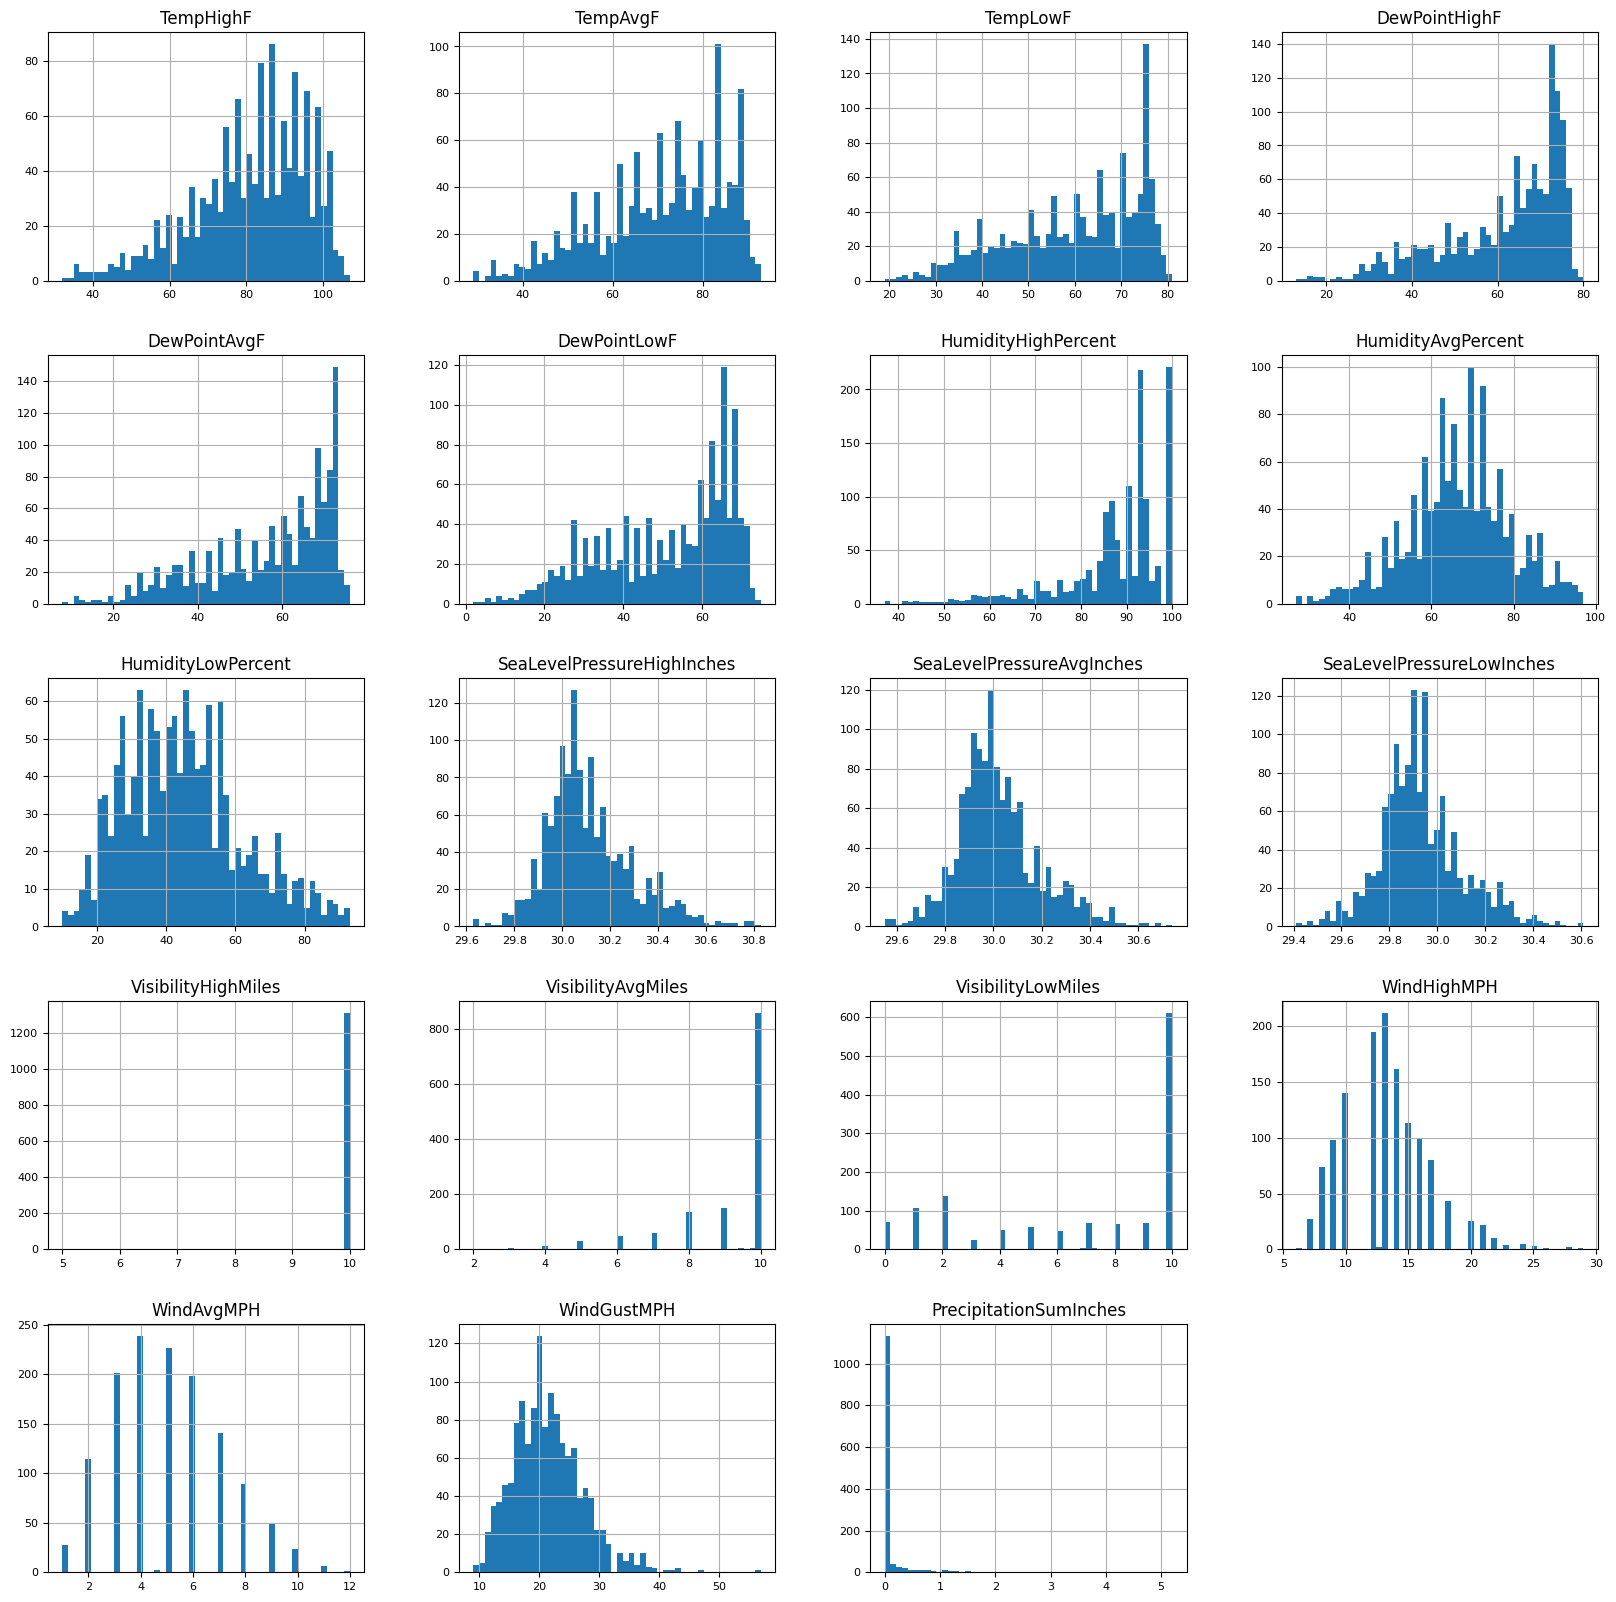

In [23]:
# show distribution of all numeric variables
df[numerical_features].hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

VisibilityHighMiles has a lot of 10 value. Lets explore it.

In [24]:
df["VisibilityHighMiles"].value_counts()

10.00000    1312
9.00000        2
8.00000        2
9.97541        2
5.00000        1
Name: VisibilityHighMiles, dtype: int64

In [25]:
df[df["VisibilityHighMiles"] < 10]

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Rain,Fog,Thunderstorm
52,2014-02-11,36.0,35.0,33.0,31.0,29.0,27.0,89.0,80.0,70.0,...,9.00000,5.000000,1.000000,15.0,9.0,23.0,0.10,1,0,0
389,2015-01-14,40.0,39.0,38.0,38.0,36.0,34.0,92.0,86.0,79.0,...,8.00000,4.000000,2.000000,9.0,5.0,15.0,0.00,0,0,0
435,2015-03-01,43.0,39.0,35.0,41.0,38.0,34.0,100.0,95.0,89.0,...,8.00000,4.000000,2.000000,10.0,6.0,16.0,0.09,1,0,0
437,2015-03-03,63.0,52.0,41.0,59.0,49.0,41.0,100.0,95.0,90.0,...,5.00000,2.000000,0.000000,8.0,1.0,13.0,0.01,1,1,0
741,2016-01-01,48.0,46.0,44.0,36.0,33.0,28.0,66.0,60.0,53.0,...,9.97541,8.959016,7.319672,15.0,8.0,24.0,0.00,1,0,0
742,2016-01-02,47.0,45.0,42.0,42.0,34.0,29.0,100.0,77.0,53.0,...,9.97541,8.959016,7.319672,8.0,2.0,13.0,0.20,1,0,0
1120,2017-01-14,56.0,52.0,47.0,51.0,50.0,46.0,100.0,92.0,83.0,...,9.00000,3.000000,1.000000,8.0,4.0,13.0,0.07,1,0,0


It seems like it determines events a lot, so we can use it as a feature.

- Correlation between numeric features

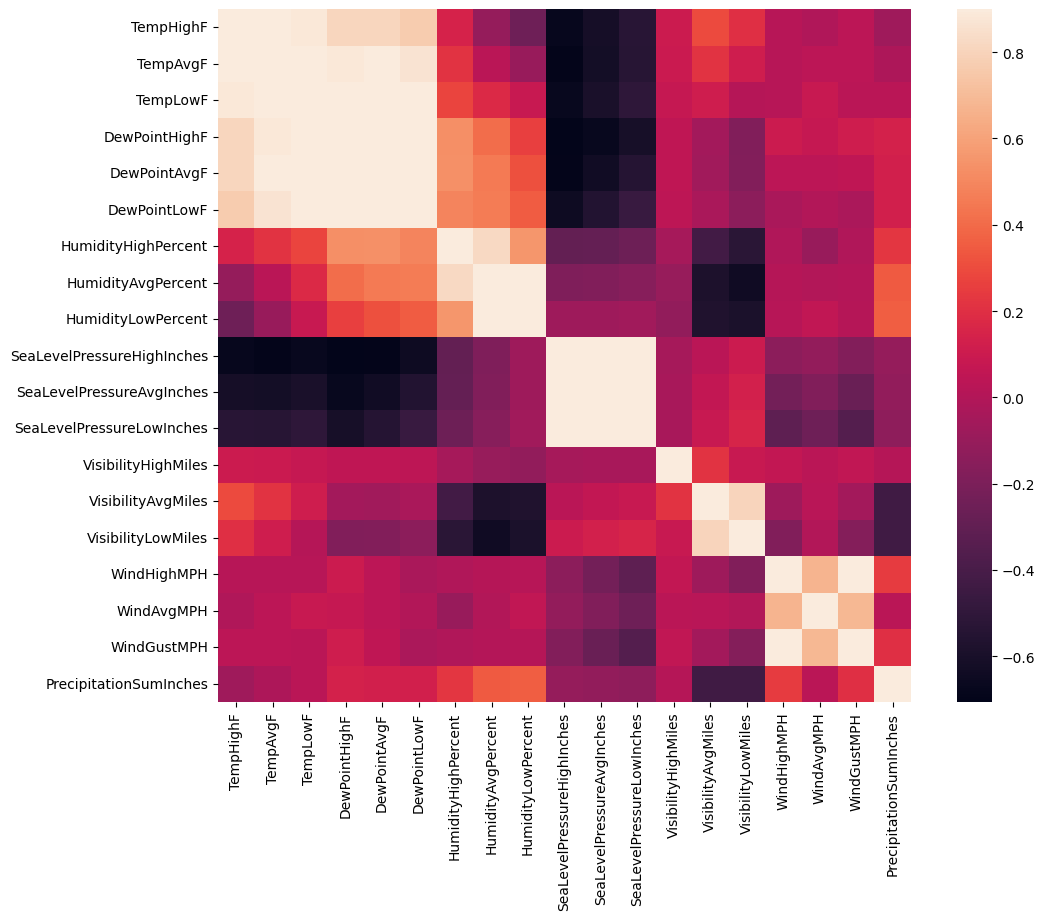

In [26]:
# show correlation matrix in Seaborn using a heatmap
corr = df[numerical_features].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=0.9, square=True);

There is a lot of correlation between numeric features. We can use PCA to reduce the dimension.

In [27]:
target = df[["Rain", "Fog", "Thunderstorm"]]

In [28]:
df["Rain"] = df["Rain"].astype(np.float64)
df["Fog"] = df["Fog"].astype(np.float64)
df["Thunderstorm"] = df["Thunderstorm"].astype(np.float64)

In [29]:
df.corr()["Rain"].sort_values(ascending=False)[1:]

Thunderstorm                  0.558070
HumidityLowPercent            0.536673
HumidityAvgPercent            0.523549
PrecipitationSumInches        0.421390
HumidityHighPercent           0.350788
Fog                           0.205582
WindHighMPH                   0.197223
WindGustMPH                   0.183058
DewPointHighF                 0.149929
DewPointAvgF                  0.140828
DewPointLowF                  0.123841
WindAvgMPH                    0.006497
TempLowF                      0.002672
SeaLevelPressureHighInches   -0.025263
SeaLevelPressureAvgInches    -0.051621
VisibilityHighMiles          -0.060765
SeaLevelPressureLowInches    -0.071844
TempAvgF                     -0.105935
TempHighF                    -0.202043
VisibilityAvgMiles           -0.529575
VisibilityLowMiles           -0.662454
Name: Rain, dtype: float64

In [30]:
df.corr()["Fog"].sort_values(ascending=False)[1:]

PrecipitationSumInches        0.416201
HumidityAvgPercent            0.255331
Thunderstorm                  0.235368
HumidityLowPercent            0.234934
HumidityHighPercent           0.212336
Rain                          0.205582
WindHighMPH                   0.152369
WindGustMPH                   0.111422
DewPointHighF                 0.090374
DewPointAvgF                  0.080330
DewPointLowF                  0.057687
TempLowF                     -0.015916
TempAvgF                     -0.033069
WindAvgMPH                   -0.043355
TempHighF                    -0.046028
SeaLevelPressureHighInches   -0.052363
SeaLevelPressureAvgInches    -0.061165
SeaLevelPressureLowInches    -0.072708
VisibilityHighMiles          -0.092554
VisibilityAvgMiles           -0.415932
VisibilityLowMiles           -0.438732
Name: Fog, dtype: float64

In [31]:
df.corr()["Thunderstorm"].sort_values(ascending=False)[1:]

Rain                          0.558070
PrecipitationSumInches        0.448175
HumidityAvgPercent            0.288724
HumidityLowPercent            0.273310
WindHighMPH                   0.271086
WindGustMPH                   0.263851
Fog                           0.235368
DewPointHighF                 0.229399
HumidityHighPercent           0.228628
DewPointAvgF                  0.216031
DewPointLowF                  0.197804
TempLowF                      0.135948
TempAvgF                      0.093157
TempHighF                     0.048453
VisibilityHighMiles           0.020994
WindAvgMPH                   -0.033778
SeaLevelPressureHighInches   -0.158412
SeaLevelPressureAvgInches    -0.175500
SeaLevelPressureLowInches    -0.181900
VisibilityAvgMiles           -0.312150
VisibilityLowMiles           -0.467343
Name: Thunderstorm, dtype: float64

We can barely see VisibilityHighMiles and VisibilityLowMiles are important features.

In [32]:
df["Rain"] = df["Rain"].astype(pd.CategoricalDtype())
df["Fog"] = df["Fog"].astype(pd.CategoricalDtype())
df["Thunderstorm"] = df["Thunderstorm"].astype(pd.CategoricalDtype())

Lets see distribution of numeric features according to events.

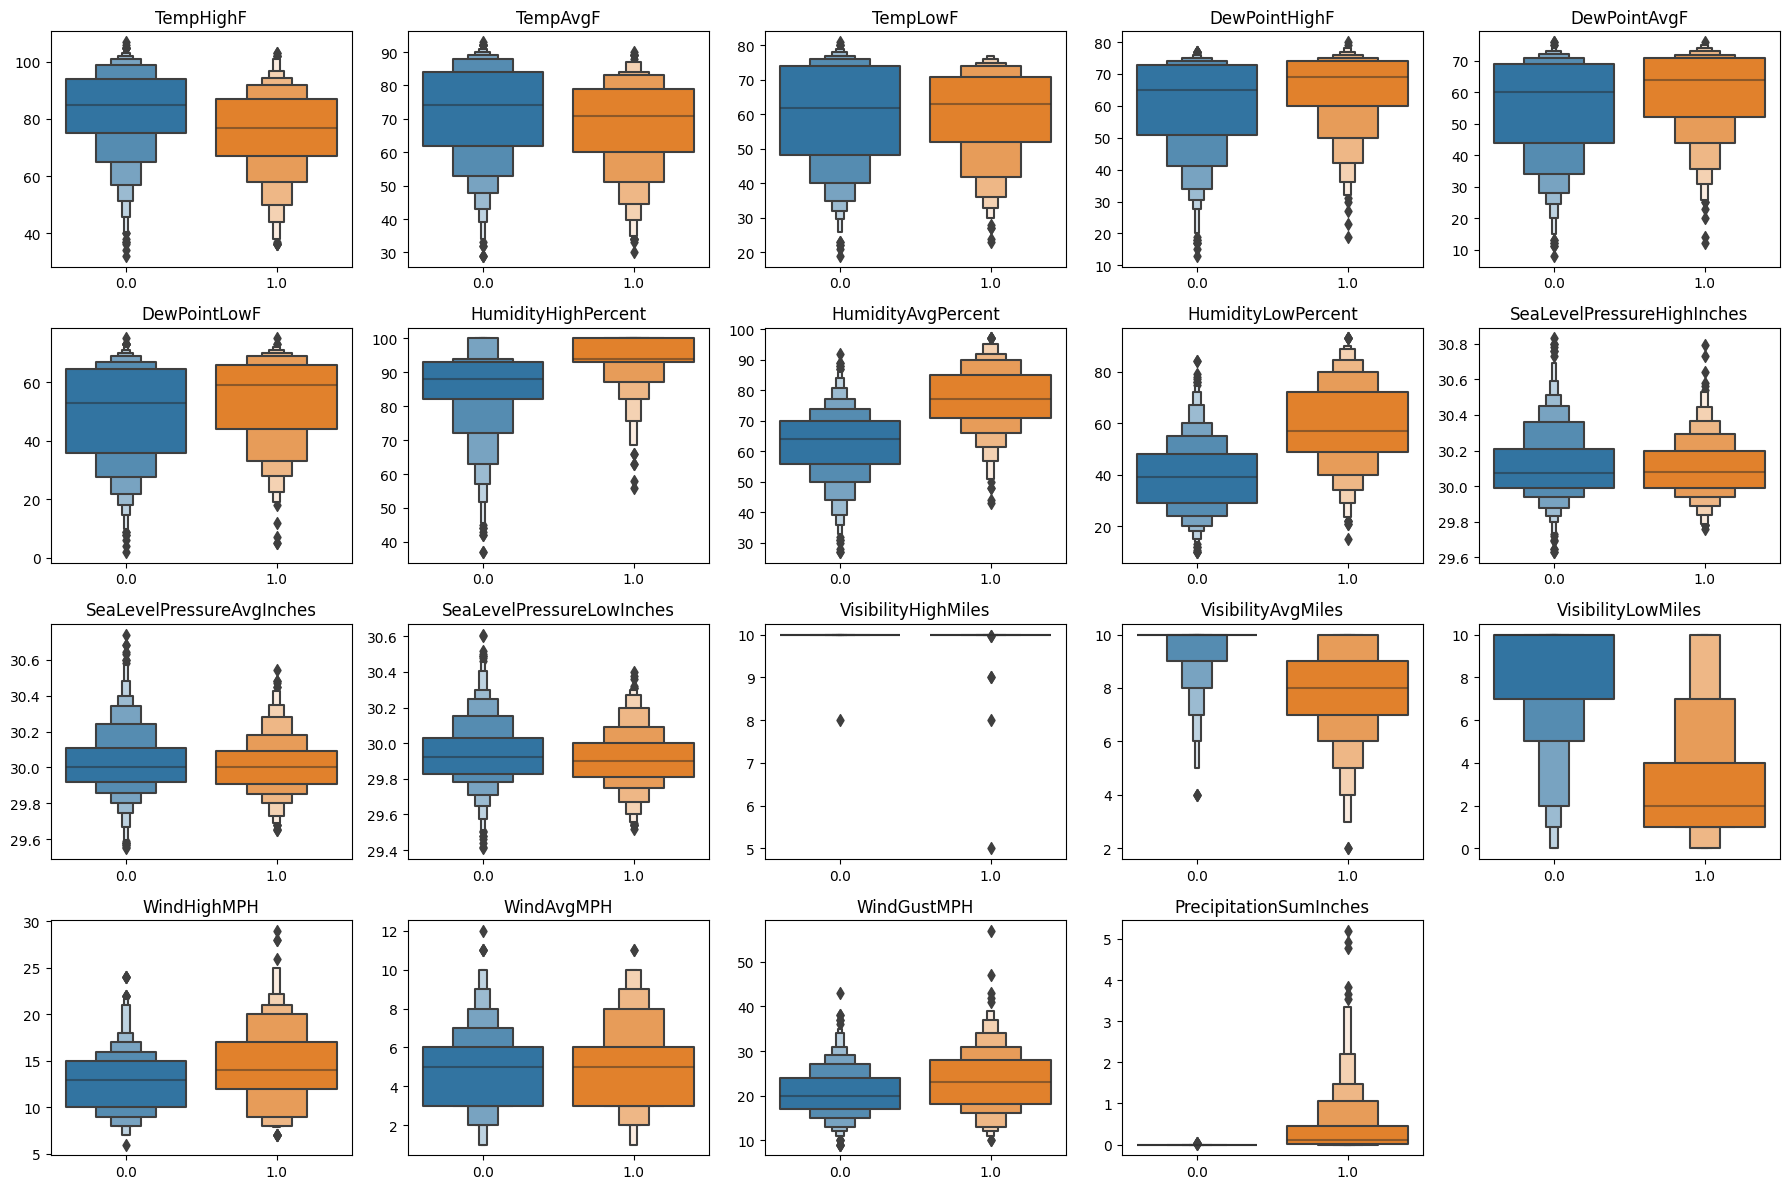

In [33]:
fig, ax = plt.subplots(4,5)

fig.set_figheight(12)
fig.set_figwidth(18)

for i, col in enumerate(numerical_features):
    plt1 = sns.boxenplot(x=df["Rain"], y=df[col], ax=ax[i//5, i%5])
    plt1.set_title(col)
    plt1.set_xlabel("")
    plt1.set_ylabel("")

plt_inv = sns.boxenplot(x=target["Rain"], y=df["TempAvgF"], ax=ax[3,4])
plt_inv.set_visible(False)

plt.tight_layout()

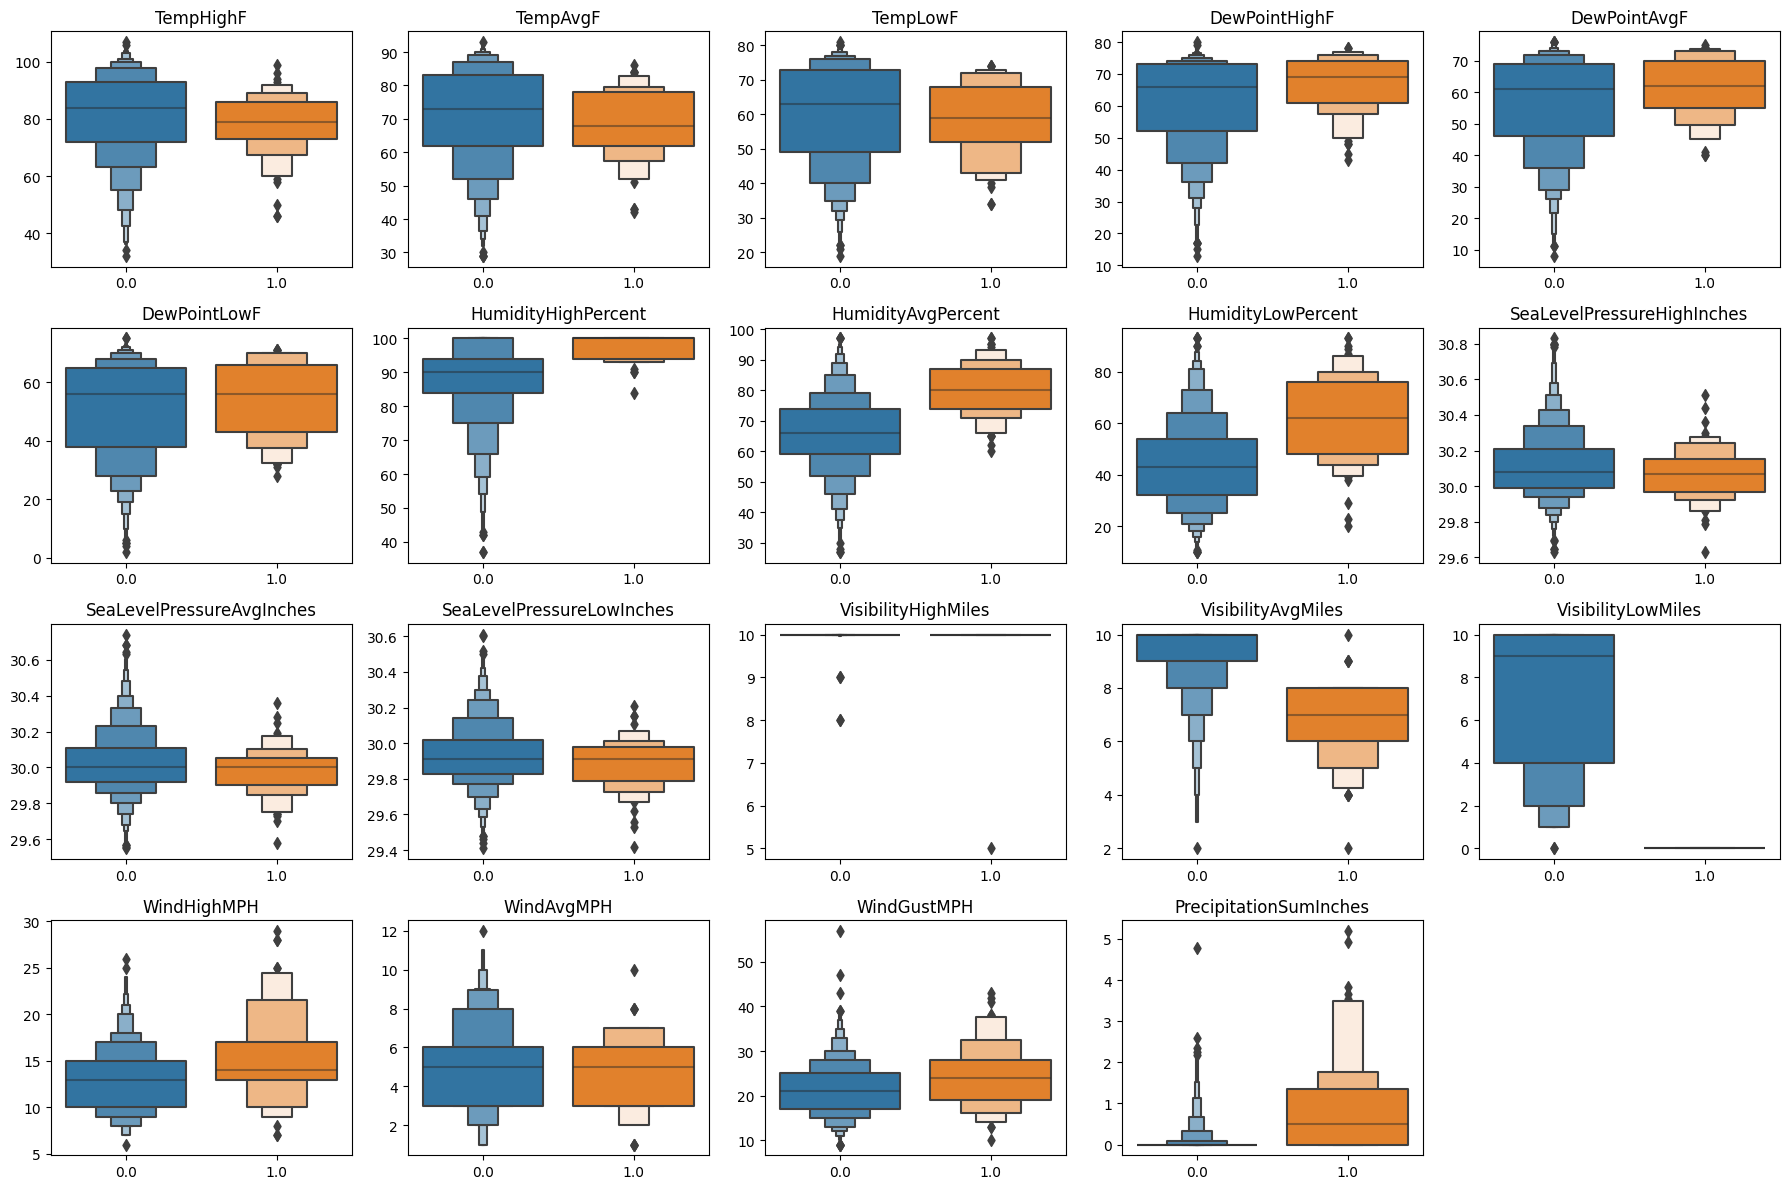

In [34]:
fig, ax = plt.subplots(4,5)

fig.set_figheight(12)
fig.set_figwidth(18)

for i, col in enumerate(numerical_features):
    plt1 = sns.boxenplot(x=df["Fog"], y=df[col], ax=ax[i//5, i%5])
    plt1.set_title(col)
    plt1.set_xlabel("")
    plt1.set_ylabel("")

plt_inv = sns.boxenplot(x=target["Rain"], y=df["TempAvgF"], ax=ax[3,4])
plt_inv.set_visible(False)

plt.tight_layout()

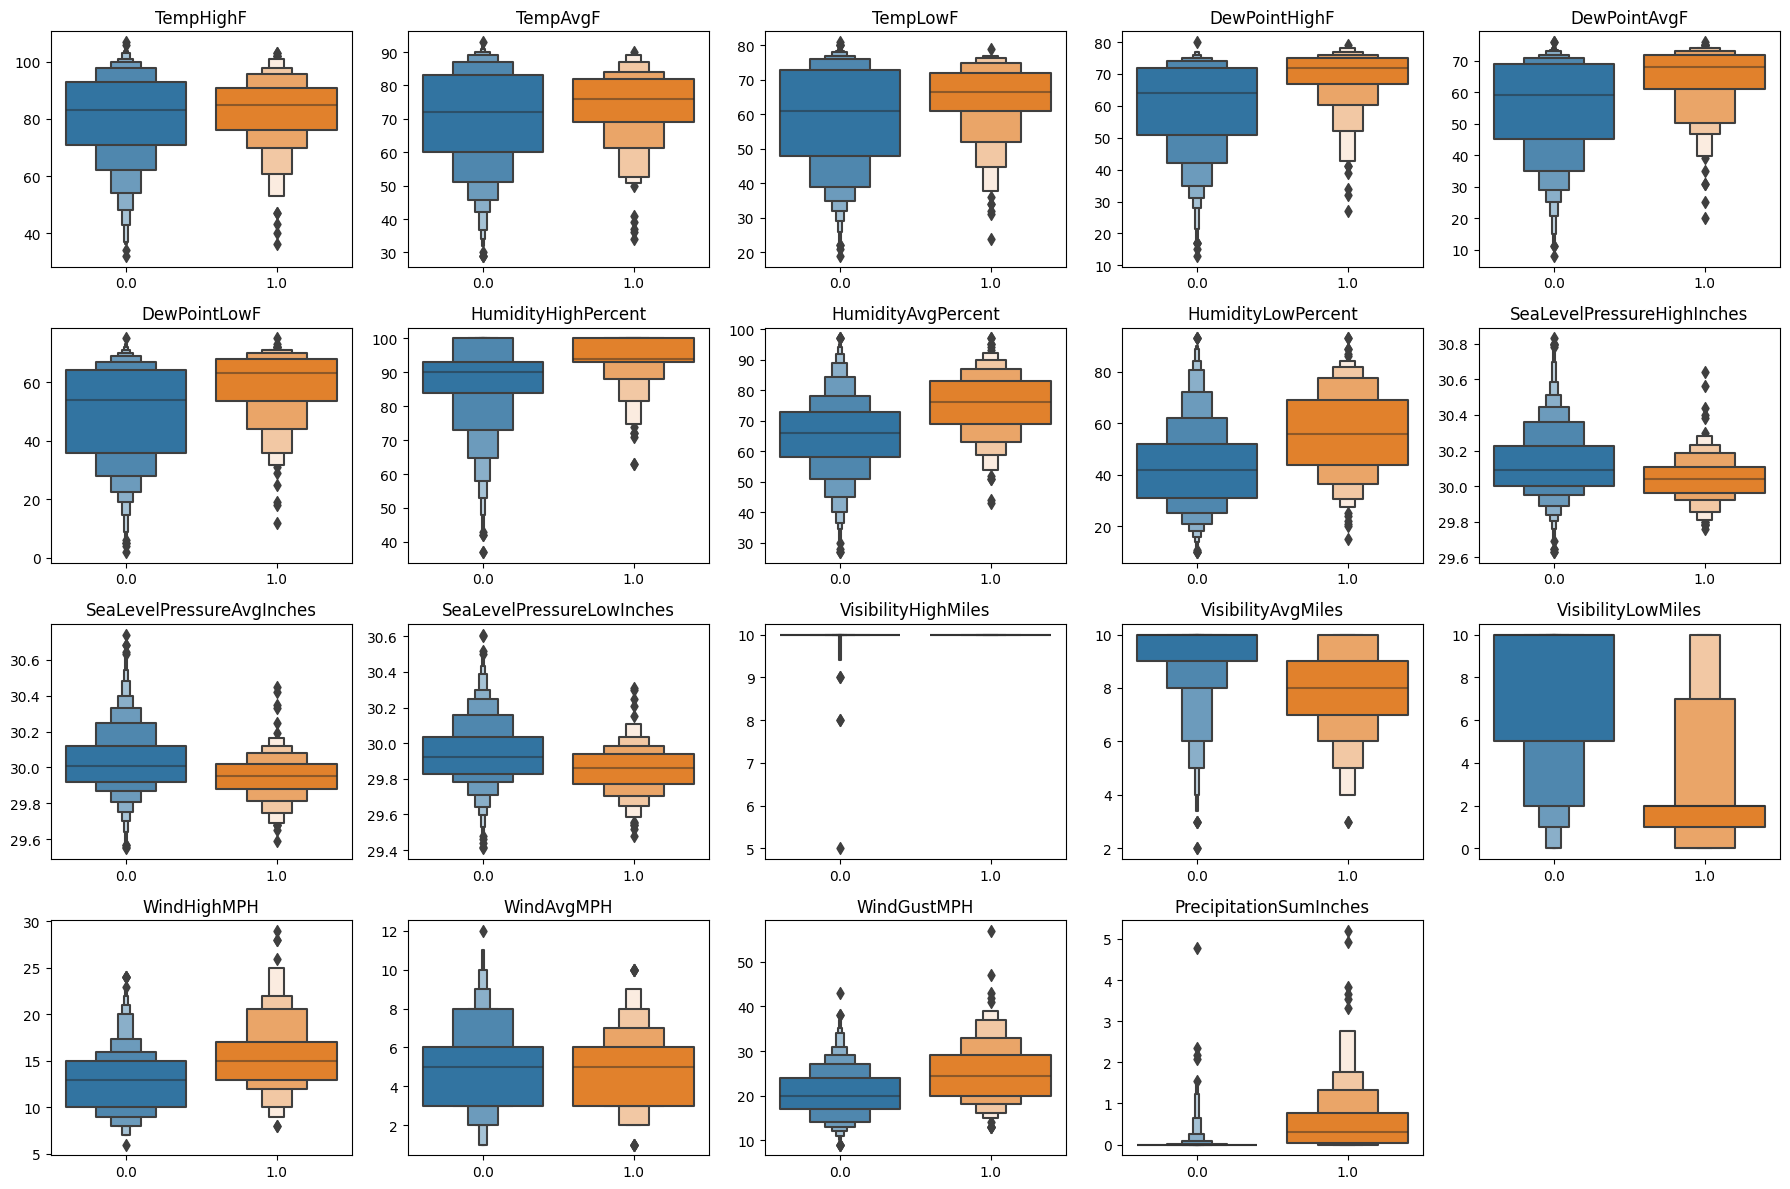

In [35]:
fig, ax = plt.subplots(4,5)

fig.set_figheight(12)
fig.set_figwidth(18)

for i, col in enumerate(numerical_features):
    plt1 = sns.boxenplot(x=df["Thunderstorm"], y=df[col], ax=ax[i//5, i%5])
    plt1.set_title(col)
    plt1.set_xlabel("")
    plt1.set_ylabel("")

plt_inv = sns.boxenplot(x=target["Rain"], y=df["TempAvgF"], ax=ax[3,4])
plt_inv.set_visible(False)

plt.tight_layout()

In [36]:
df["Rain"].value_counts()

0.0    942
1.0    377
Name: Rain, dtype: int64

In [37]:
df["Fog"].value_counts()

0.0    1250
1.0      69
Name: Fog, dtype: int64

In [38]:
df["Thunderstorm"].value_counts()

0.0    1131
1.0     188
Name: Thunderstorm, dtype: int64